# 과제 1

## Matrix 구현 
1. Linear Regression에서 쓰이는 **정규방정식**을 행렬로 구현하고, sklearn 혹은 OLS 패키지를 통해 구한 **실제 값과 비교**해주세요.
2. LSE에서 쓰이는 Loss Function, **MSE**를 행렬로 구현해 출력해주세요.

### Data Load 

In [3]:
import pandas as pd 
data = pd.read_csv("assignment1.csv")

In [4]:
data.head()

,y,x1,x2,x3,x4,x5
0,10,38.9,64.7,4,868,59.7
1,13,41.6,45.3,-4,957,61.4
2,11,39.7,74.1,8,786,61.0
3,7,37.3,48.0,19,984,67.5
4,10,39.5,51.9,6,700,57.2


In [5]:
data.shape     # y:(9,1), X:(9,5)

(9, 6)

In [6]:
X = data.drop(["y"], axis=1)
y = data.y

In [7]:
# Matrix 계산을 위해 X와 y를 numpy 형태로 바꾸어줍니다. 
X = X.to_numpy()
y = y.to_numpy()

In [8]:
X

array([[  38.9,   64.7,    4. ,  868. ,   59.7],
       [  41.6,   45.3,   -4. ,  957. ,   61.4],
       [  39.7,   74.1,    8. ,  786. ,   61. ],
       [  37.3,   48. ,   19. ,  984. ,   67.5],
       [  39.5,   51.9,    6. ,  700. ,   57.2],
       [  37.4,   53.6,   -5. , 1037. ,   58.8],
       [  35.1,   71.4,    3. ,  986. ,   58.6],
       [  38.8,   58.3,    6. ,  819. ,   59.2],
       [  36.6,   52.6,  -19. ,  791. ,   54.4]])

In [9]:
y

array([10, 13, 11,  7, 10,  9,  9,  6,  5], dtype=int64)

### 1. Normal Equation

## 정규방정식 : $\hat{\beta} = (X^{'}X)^{-1}X^{'}y $
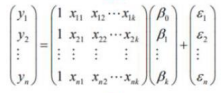
위 그림에서 가장 설명 변숭의 가장 왼쪽에 1로 이루어진 열이 있음을 알 수 있다.

designX를 1로 구성된 열을 포함한 행렬식으로 만들고, 이를 이용하여 ${\beta}$를 구한다.

In [10]:
import numpy as np
from numpy.linalg import inv 

In [11]:
def estimate_beta(X, y):
    designX = np.concatenate([np.ones((len(y), 1)), X], axis=1)
    # np.ones(len(y) : 반응변수 y의 개수만큼의 1로 채워진 행렬
    # np.concatenate([np.ones((len(y), 1)), X], axis=1) : axis=1를 축으로 np.ones((len(y)과 X를 합친다.
   
    beta_hat = np.dot(np.dot(inv(np.dot(designX.T, designX)), designX.T), y) # B = (X'X)-1X'y
    # np.dot(designX.T, designX) : 전치한 designX와 기존 designX의 행렬곱
    # inv(np.dot(designX.T, designX)) : 역행렬을 구함
    # np.dot(inv(np.dot(designX.T, designX)), designX.T) : 역행렬과 전치한 designX의 행렬곱
    # np.dot(np.dot(inv(np.dot(designX.T, designX)), designX.T), y) : 결과값을 y와 행렬곱
    
    return beta_hat

In [12]:
beta_hat = estimate_beta(X, y)
beta_hat

array([-3.92447368e+01,  1.31232583e+00,  8.53744361e-02,  7.41849897e-02,
        1.50018573e-02, -3.42273652e-01])

#### 실제 값과 비교

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()
model.fit(X, y)  

pred = model.predict(X)

In [53]:
print(model.intercept_)   # intercept
print(model.coef_)   # 추정된 회귀계수 (intercept 제외)

-39.24473678135658
[ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]


조금 차이가 있지만 유사한 값이다.

### 2. MSE

$MSE = 	\frac{1}{n-(k+1)}\sum (y - \hat{y})^2 $ (n = 관측치의 개수, k = 설명변수 x의 개수)

$ \hat{y} = X\hat{\beta} $ 




In [34]:
def MSE(X, y, beta_hat):
    designX = np.concatenate([np.ones((len(y), 1)), X], axis=1)
    y_pred = np.dot(designX, beta_hat)
    # designX와 beta_hat를 행렬곱하여 예측값을 구함
    
    mse = np.sum((y - y_pred)**2) / (len(y) - len(designX.T))
    # (y - y_pred) : 실제값과 예측값의 차이
    # np.sum((y - y_pred)**2) : 차이의 제곱의 합
    # np.sum((y - y_pred)**2) / (len(y) - len(designX.T)) : 제곱의 합을 관측치의 개수와 (설명변수+1)의 차이로 나눔
    return mse

In [35]:
MSE(X, y, estimate_beta(X, y))

4.846793168705752